In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
# from google.colab import drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# load Dataset
df=pd.read_csv("../input/road-accidents-incidence/Kaagle_Upload.csv", sep=",", decimal=",", engine='python') # Read the data from a csv

In [5]:
# display 10 row of data
df.head(10)

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201506E098780,2,1,0,9,0,5,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
7,201506E098792,2,9,0,4,0,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,201506E098804,1,9,0,14,0,1,0,0,0,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
9,201506E098826,1,9,0,4,0,0,0,0,0,...,5.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0


In [6]:
# displays all data features in dataset
df.dtypes

accident_index                         object
vehicle_reference                       int64
vehicle_type                            int64
towing_and_articulation                 int64
vehicle_manoeuvre                       int64
                                       ...   
bus_or_coach_passenger                float64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
Length: 70, dtype: object

In [7]:
# display overview of the structure of the data frame and data type associated in the column
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-nu

In [8]:
# display the number of data obtained (columns,row)
print("Dataset size:\n")
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Dataset size:

Number of rows: 285331
Number of columns: 70


In [9]:
# checking for duplicated
sum(df.duplicated())

0

In [10]:
# Checking for missing value
display(df.isna().sum())

accident_index                            0
vehicle_reference                         0
vehicle_type                              0
towing_and_articulation                   0
vehicle_manoeuvre                         0
                                      ...  
bus_or_coach_passenger                99259
pedestrian_road_maintenance_worker    99259
casualty_type                         99259
casualty_home_area_type               99259
casualty_imd_decile                   99259
Length: 70, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

accident_index                        0
vehicle_reference                     0
vehicle_type                          0
towing_and_articulation               0
vehicle_manoeuvre                     0
                                     ..
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
Length: 70, dtype: int64

In [14]:
value_mapping_vechicle = {1: 'Pedal cycle', 2: 'Motorcycle 50cc and under', 3: 'Motorcycle 125cc and under', 4: 'Motorcycle over 125cc and up to 500cc', 5: 'Motorcycle over 500cc',
                  8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8 - 16 passenger seats)', 11: 'Bus or coach (17 or more pass seats)', 16: 'Ridden horse',17: 'Agricultural vehicle',
                  18:'Tram',19:'Van / Goods 3.5 tonnes mgw or under',20:'Goods over 3.5t. and under 7.5t',21:'Goods 7.5 tonnes mgw and over',22:'Mobility scooter',23:'Electric motorcycle',90:'Other vehicle',
                  97:'Motorcycle - unknown cc', 98:'Goods vehicle - unknown weight', -1: 'Data missing or out of range'}

df['vehicle_type'] = df['vehicle_type'].replace(value_mapping_vechicle)

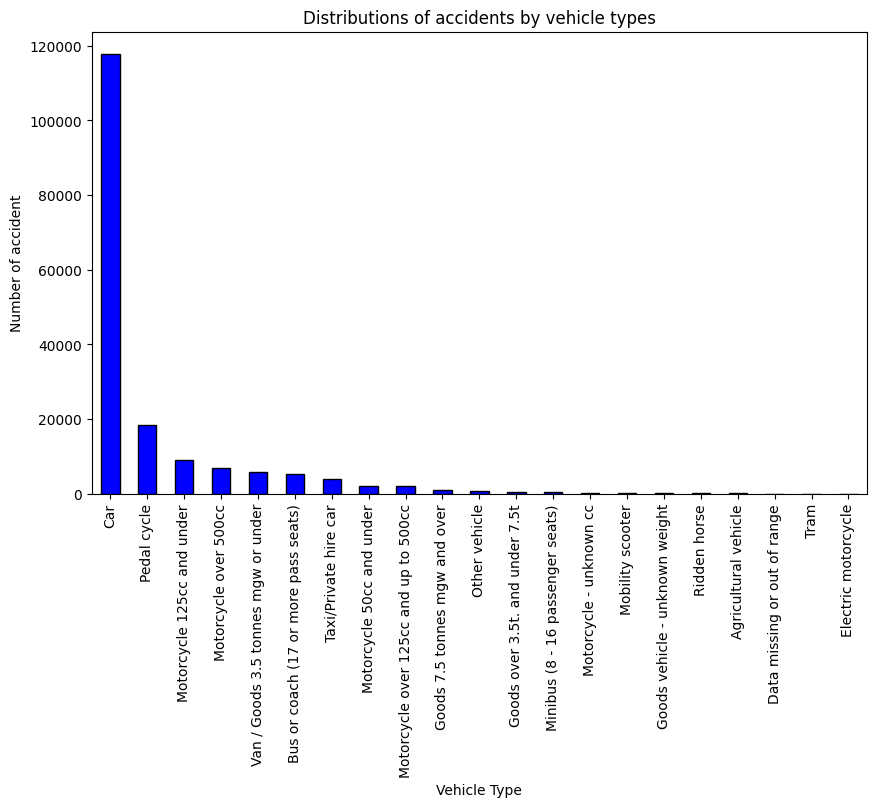

In [15]:
# Creating a histogram to visualize distributions of accidents by vehicle types
plt.figure(figsize=(10, 6))
# plt.hist(df['vehicle_type'], edgecolor='black')
df['vehicle_type'].value_counts().plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('Vehicle Type')
plt.ylabel('Number of accident')
plt.title('Distributions of accidents by vehicle types')


# plt.title('Distributions of accidents by vehicle types')
# plt.xlabel('Vehicle types')
# plt.ylabel('Number of accident')
plt.show()

In [16]:
value_mapping_whether = {1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds',
                  6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown',-1: 'out of range'}

df['weather_conditions'] = df['weather_conditions'].replace(value_mapping_whether)

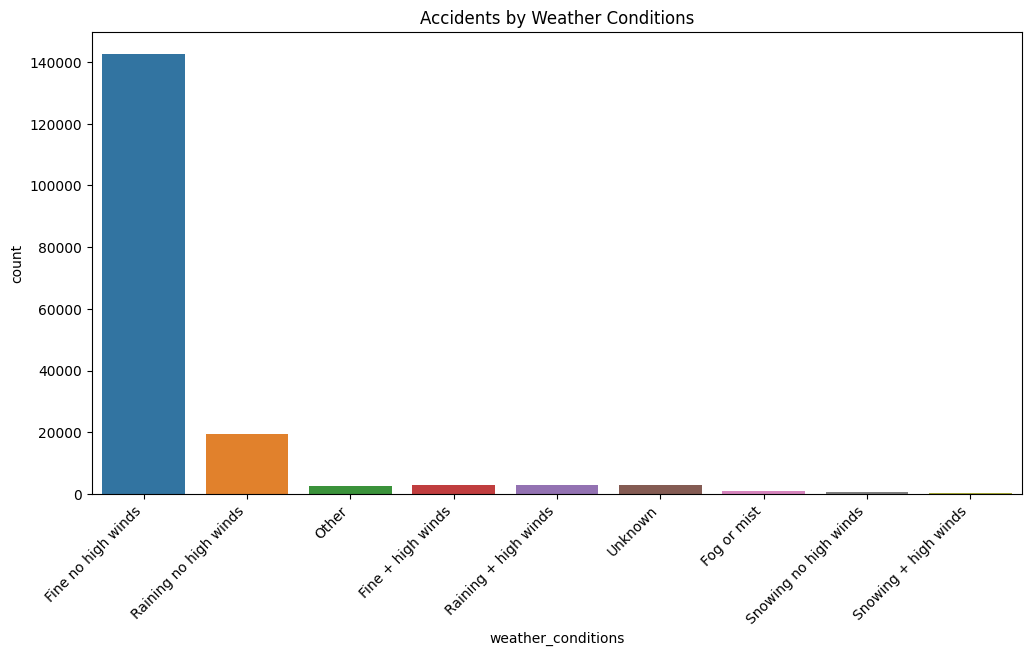

In [17]:
# Countplot for accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='weather_conditions', data=df)
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
# Define the mapping of old values to new values
value_mapping1 = {1: 'Urban', 2: 'Rural', 3: 'Unallocated'}
value_mapping2 = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

# Replace values in the 'Attribute' column
df['urban_or_rural_area'] = df['urban_or_rural_area'].replace(value_mapping1)
df['accident_severity'] = df['accident_severity'].replace(value_mapping2)

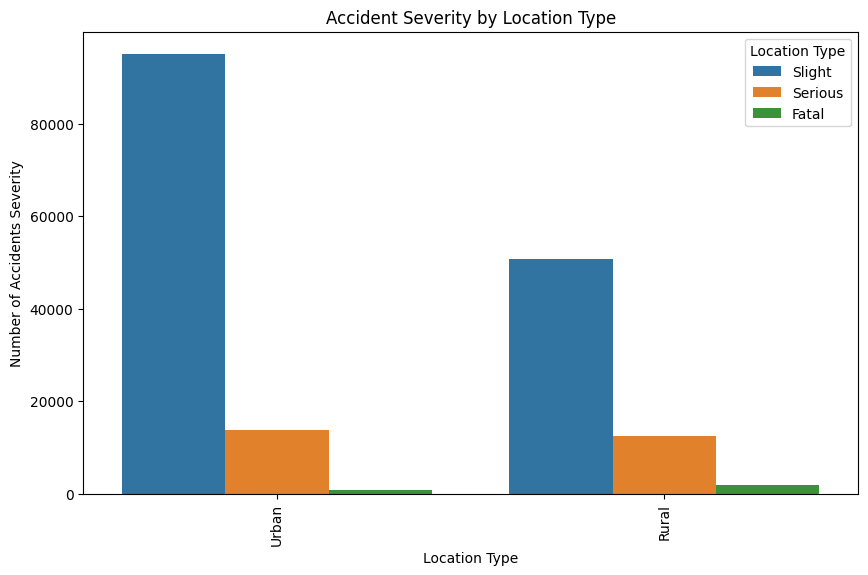

In [21]:
# Assuming the dataset has 'Accident Severity' and 'Location Type' columns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='urban_or_rural_area', hue='accident_severity')
plt.title('Accident Severity by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Accidents Severity')
plt.xticks(rotation=90)
plt.legend(title='Location Type')
plt.show()